In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
WIDTH = 1800
HEIGHT = 800

AIRCRAFT_SIZE = 24
COLLISION_RADIUS = 2 * AIRCRAFT_SIZE
GOAL_RADIUS = 5 * AIRCRAFT_SIZE
SAFE_DISTANCE = 4 * COLLISION_RADIUS

PLAYER_X = COLLISION_RADIUS
PLAYER_Y = HEIGHT / 2

GOAL_X = WIDTH - GOAL_RADIUS
GOAL_Y = HEIGHT / 2

In [3]:
simulation_data_file = "../gym_ACAS2D/models/logs/baseline_ACAS2D_PPO_8_100.csv"
simulation = pd.read_csv(simulation_data_file)
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Episode        100 non-null    int64  
 1   Outcome        100 non-null    object 
 2   Total Reward   100 non-null    float64
 3   Time Steps     100 non-null    int64  
 4   Path           100 non-null    object 
 5   Traffic Paths  100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [4]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path,Traffic Paths
0,1,Goal,1144.878785,766,"[(48, 400.0), (49.998468716044925, 399.9217517...","[[(1152.0, 48), (1152.0, 48), (1150.1407651254..."
1,2,Goal,1144.142677,763,"[(48, 400.0), (49.99894800746714, 400.06486033...","[[(1152.0, 752), (1152.0, 752), (1150.58061273..."
2,3,Collision,-987.225945,289,"[(48, 400.0), (49.999350933065585, 399.9490505...","[[(1152.0, 48), (1152.0, 48), (1150.1844427873..."
3,4,Collision,-999.457022,277,"[(48, 400.0), (49.9983439685915, 400.081371882...","[[(1152.0, 752), (1152.0, 752), (1150.24804573..."
4,5,Goal,1150.159910,758,"[(48, 400.0), (49.999967753918455, 400.0113570...","[[(1152.0, 48), (1152.0, 48), (1150.2000016051..."


In [5]:
simulation.describe()

,Episode,Total Reward,Time Steps
count,100.000000,100.000000,100.000000
mean,50.500000,-65.128797,485.730000
std,29.011492,1102.345827,237.827493
min,1.000000,-1000.000000,276.000000
25%,25.750000,-999.739354,281.750000
50%,50.500000,-993.593468,294.500000
75%,75.250000,1181.773399,760.250000
max,100.000000,1369.715702,774.000000


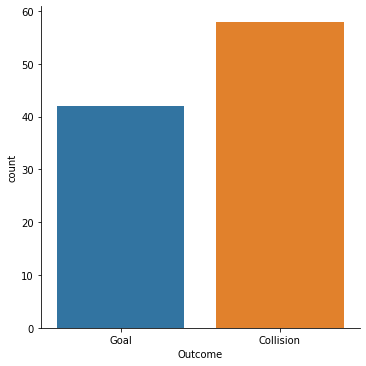

In [6]:
sns.catplot(x="Outcome", data=simulation, order =["Goal", "Collision"], kind="count")

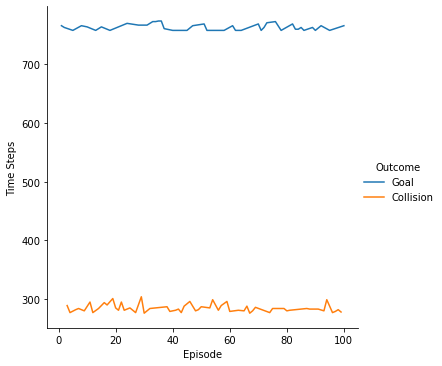

In [7]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome", 
            hue_order =["Goal", "Collision"])

<AxesSubplot:xlabel='Outcome', ylabel='Time Steps'>

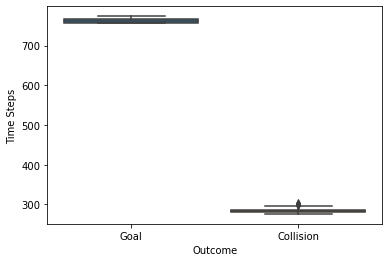

In [8]:
sns.boxplot(x="Outcome", y="Time Steps", 
            order =["Goal", "Collision"], 
            data=simulation)

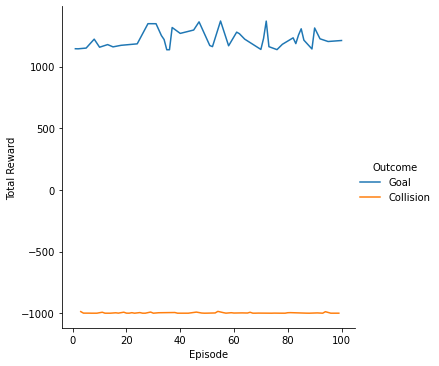

In [9]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome", 
            hue_order =["Goal", "Collision"])

<AxesSubplot:xlabel='Outcome', ylabel='Total Reward'>

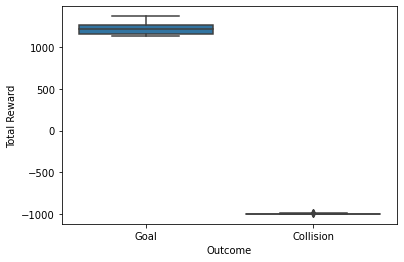

In [10]:
sns.boxplot(x="Outcome", y="Total Reward", 
            data=simulation, 
            order =["Goal", "Collision"])

In [11]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [12]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48573 entries, 0 to 48572
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  48573 non-null  int64  
 1   Outcome  48573 non-null  object 
 2   x        48573 non-null  float64
 3   y        48573 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ MB


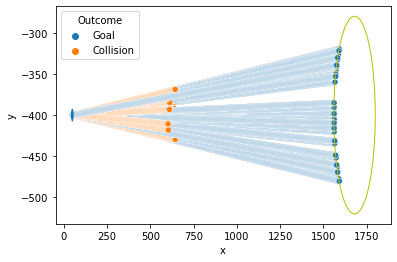

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(x="x", y="y", hue="Outcome", hue_order=["Goal", "Collision"], data=paths_df, ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)

In [14]:
t_paths_df = pd.DataFrame()

e_values, o_values, t_values, x_values, y_values = [], [], [], [], []
for index, row in simulation.iterrows():
    t_paths = ast.literal_eval(row["Traffic Paths"])
    for n in range(len(t_paths)):
        for (x, y) in t_paths[n]:
            e_values.append(row["Episode"])
            o_values.append(row["Outcome"])
            t_values.append(n)
            x_values.append(x)
            y_values.append(-y)

t_paths_df["Episode"] = e_values
t_paths_df["Outcome"] = o_values
t_paths_df["Traffic Aircraft"] = t_values
t_paths_df["x"] = x_values
t_paths_df["y"] = y_values

t_paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48573 entries, 0 to 48572
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Episode           48573 non-null  int64  
 1   Outcome           48573 non-null  object 
 2   Traffic Aircraft  48573 non-null  int64  
 3   x                 48573 non-null  float64
 4   y                 48573 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ MB


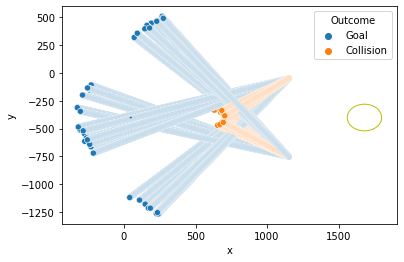

In [15]:
fig, ax = plt.subplots()

sns.scatterplot(x="x", y="y", hue="Outcome", hue_order=["Goal", "Collision"], data=t_paths_df, ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)

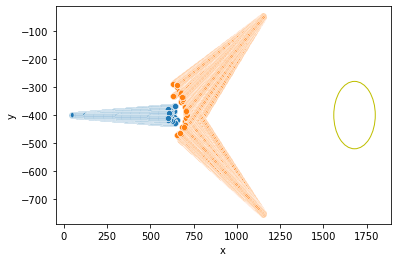

In [16]:
fig, ax = plt.subplots()


sns.scatterplot(x="x", y="y", data=paths_df[paths_df["Outcome"]=="Collision"], ax=ax)
sns.scatterplot(x="x", y="y", data=t_paths_df[t_paths_df["Outcome"]=="Collision"], ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)